#### Regime change



In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2015-01-01'
end_date = '2023-08-01'

apple = yf.download('AAPL', start = start_date, end = end_date).iloc[:,:-1]
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498684
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072325
...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427


In [2]:
import AdvancedTimeSeries as ats
import statsmodels.api as sm
import matplotlib.pyplot as plt

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(apple).dropna()
        df2 = ats.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/junghunl

d: 0.1, error: division by zero
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: Invalid input, x is constant
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.075185,9.518548e-01,1.0,2155.0,-2.862882,1.000000
0.5,-1.260632,6.469853e-01,1.0,5.0,-3.929280,0.887011
0.6,-2.154825,2.230478e-01,1.0,13.0,-3.127149,0.556117
0.7,-3.912521,1.944609e-03,1.0,37.0,-2.943539,0.181059
0.8,-8.264837,4.970473e-13,1.0,107.0,-2.888955,0.146515
0.9,-13.747610,1.065264e-25,1.0,377.0,-2.869237,0.187848
1.0,-34.497045,0.000000e+00,1.0,2154.0,-2.862883,0.023718
1.1,-26.727279,0.000000e+00,1.0,1052.0,-2.864291,-0.003630
1.2,-29.551898,0.000000e+00,1.0,1114.0,-2.864138,0.002519
1.3,-34.233119,0.000000e+00,1.0,1318.0,-2.863735,0.006049


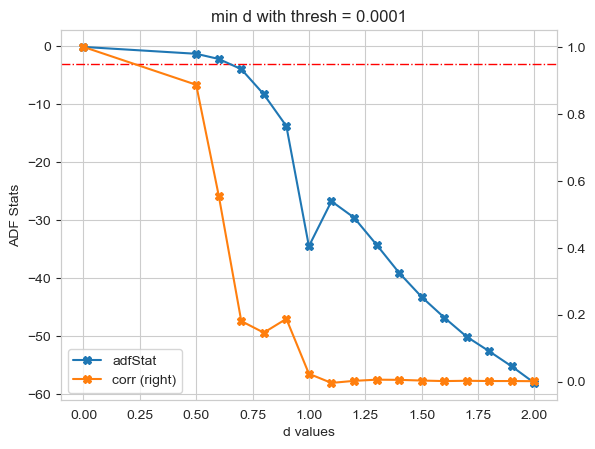

In [3]:
f,ax = plt.subplots()
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats')
display(out)

Text(0.5, 1.0, 'Expanding Window Fractional Differentiated Series')

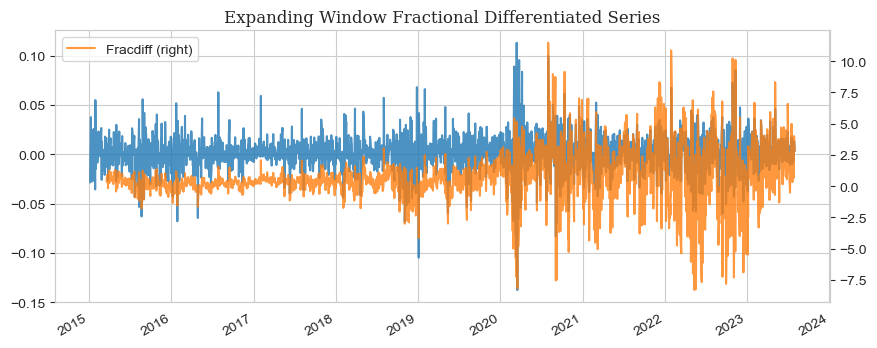

In [4]:
plt.figure(figsize = (10,4))
plt.plot(np.log(apple.Close / apple.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff(apple, 0.7).Close.plot(secondary_y = True, alpha = 0.8, label = 'Fracdiff')
plt.legend()
plt.title('Expanding Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

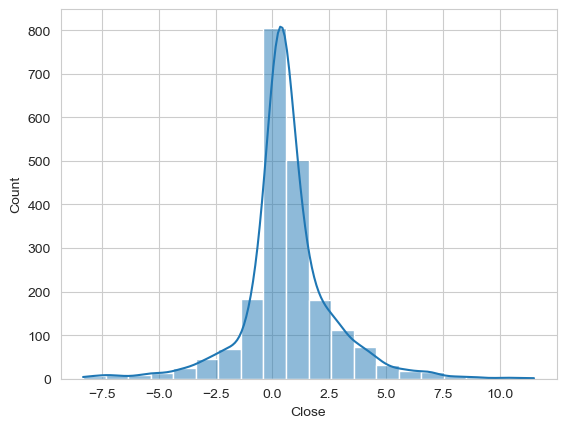

In [5]:
import seaborn as sns
sns.histplot(ats.fracDiff(apple, 0.7).Close, kde = True, bins = 20)

In [6]:
sadf = ats.get_bSADF_test_statistics(np.log(apple.Close), minSL = 100, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum ADF test (Apple)')

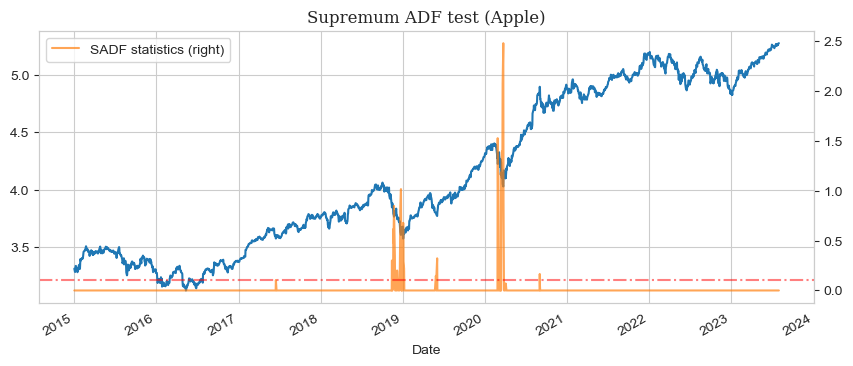

In [7]:
plt.figure(figsize = (10, 4))
plt.plot(np.log(apple.Close))
sadf.plot(secondary_y = True, alpha = 0.7, label = 'SADF statistics')
plt.legend(loc = 'upper left')
plt.axhline(np.log(apple.Close).mean() * (1.65 * np.log(apple.Close).std() / np.sqrt(2158)), color = 'r', ls = '-.', alpha = 0.5)
plt.title('Supremum ADF test (Apple)', fontfamily = 'Serif', fontsize = 12)

In [8]:
ret = ats.fracDiff(apple, 0.7).Close
ret_quantile = pd.qcut(ret, q = 10, labels = range(10))
message = ''.join(map(str, ret_quantile.values))

In [9]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.10970105890611823
Konto's Entropy estimation: 2.264501834043732


In [10]:
segments = ats.generate_buckets(series = ret, sigma = ret.std())
ret_sigma = ret.apply(lambda obs: ats.encode_single_obs(obs = obs, segments = segments))
message = ''.join(map(str, ret_sigma.values))

Text(0.5, 1.0, 'Sigma Encoding (Apple)')

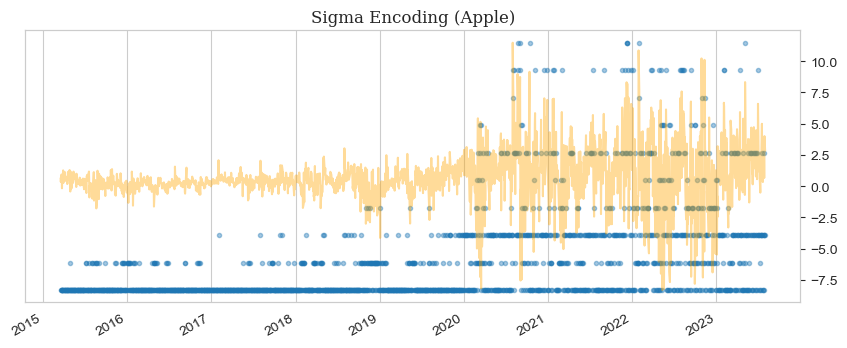

In [11]:
plt.figure(figsize = (10,4))
plt.scatter(ret_sigma.index, ret_sigma, marker = '.', alpha = 0.4)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Sigma Encoding (Apple)', fontfamily = 'Serif', fontsize = 12)

In [12]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.10970105890611823
Konto's Entropy estimation: 1.3014697138519153


In [13]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [14]:
bin = ats.OptimizeBins(len(ret), corr = None)
print('Optimized Bin : ', bin)

Optimized Bin :  19


In [15]:
etp = []
for i in range(100, len(ret)) :
    hX = ss.entropy(np.histogram(ret[i-100:i], bin)[0])
    etp.append(hX)
etp = pd.DataFrame(etp, index = ret.index[100:])
etp.columns = ['Market Entropy']
etp

,Market Entropy
2015-08-11,2.594468
2015-08-12,2.577126
2015-08-13,2.577126
2015-08-14,2.574759
2015-08-17,2.572244
...,...
2023-07-25,2.561929
2023-07-26,2.575996
2023-07-27,2.573309
2023-07-28,2.551147


Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

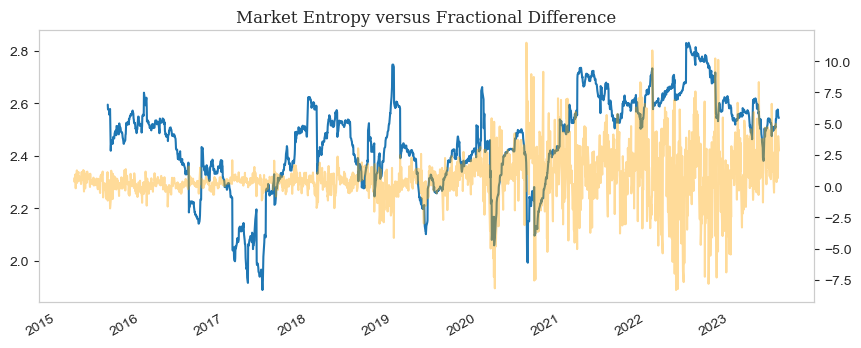

In [16]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

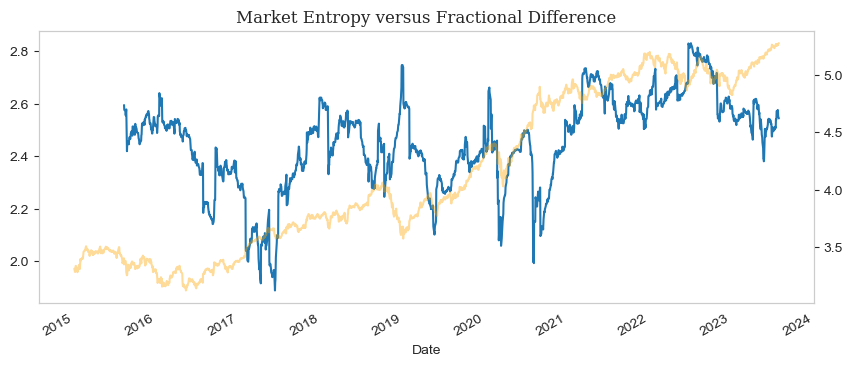

In [17]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

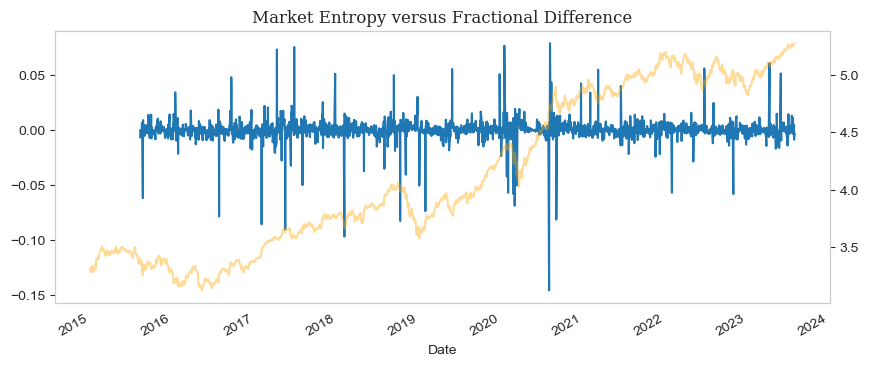

In [18]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp.pct_change())
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

In [19]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

In [20]:
becker_parkinson = getSigma(getBeta(apple, 1), getGamma(apple))
becker_parkinson

Date
2015-01-05    0.032692
2015-01-06    0.014061
2015-01-07    0.018803
2015-01-08    0.038756
2015-01-09    0.017714
                ...   
2023-07-25    0.003860
2023-07-26    0.005906
2023-07-27    0.007562
2023-07-28    0.007161
2023-07-31    0.004082
Length: 2157, dtype: float64

In [21]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import statsmodels.api as sm
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained ** 2

    def untransform_params(self, constrained):
        return constrained ** 0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [22]:
model = LocalLinearTrend(becker_parkinson)
result = model.fit(disp = True)

print(result.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94533D-01    |proj g|=  3.67415D+00

At iterate    1    f= -1.58339D+00    |proj g|=  1.17482D+01

At iterate    2    f= -1.60770D+00    |proj g|=  1.16681D+01
  ys=-4.870E-04  -gs= 2.153E-02 BFGS update SKIPPED

At iterate    3    f= -1.60799D+00    |proj g|=  1.16674D+01

At iterate    4    f= -2.25823D+00    |proj g|=  1.99680D+01

At iterate    5    f= -2.40237D+00    |proj g|=  1.92949D+01

At iterate    6    f= -2.76320D+00    |proj g|=  1.39926D+02

At iterate    7    f= -2.77689D+00    |proj g|=  2.24638D+02

At iterate    8    f= -2.78053D+00    |proj g|=  7.77826D+01

At iterate    9    f= -2.78381D+00    |proj g|=  1.68690D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


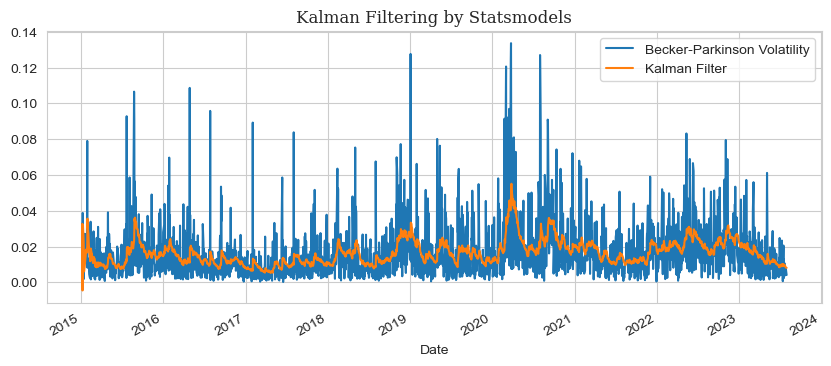

In [23]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Becker-Parkinson Volatility": becker_parkinson,
                      "Kalman Filter": predict.predicted_mean})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtering by Statsmodels", fontfamily = 'Serif', fontsize = 12)
plt.show()

In [24]:
ret = np.log(apple.Close / apple.Close.shift(1)).dropna()

In [25]:
volatility = predict.predicted_mean

In [26]:
ma5 = apple.Close.rolling(window = 5, center = False).mean()
ma60 = apple.Close.rolling(window = 60, center = False).mean()

In [27]:
fracdiff = ats.fracDiff_FFD(apple, 0.7).Close

In [28]:
#rsi = momentum.rsi(apple.Close)

In [75]:
matrix = pd.concat([ret, fracdiff, sadf, etp, volatility, ma5, ma60], axis = 1).dropna()
matrix.columns = ['Log return','Fracdiff','SADF','Entropy','Volatility','MA5','MA60']
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60
2016-06-23,0.005740,0.149900,0.0,2.378766,0.010167,23.899500,25.006833
2016-06-24,-0.028498,-0.608517,0.0,2.374844,0.009724,23.803000,24.941875
2016-06-27,-0.014668,-0.482463,0.0,2.374844,0.011574,23.650000,24.867083
2016-06-28,0.016700,0.213618,0.0,2.383835,0.012425,23.534000,24.794042
2016-06-29,0.008618,0.212449,0.0,2.386987,0.012222,23.476500,24.729833
...,...,...,...,...,...,...,...
2023-07-25,0.004503,2.836308,0.0,2.561929,0.008993,193.308002,181.759334
2023-07-26,0.004535,3.054049,0.0,2.575996,0.008559,193.188000,182.173000
2023-07-27,-0.006603,1.035496,0.0,2.573309,0.008325,193.206000,182.566834
2023-07-28,0.013418,4.383522,0.0,2.551147,0.008244,193.984000,183.021667


In [76]:
matrix['Labels'] = 0
matrix.loc[matrix['MA5'] > matrix['MA60'], 'Labels'] = 1

In [77]:
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60,Labels
2016-06-23,0.005740,0.149900,0.0,2.378766,0.010167,23.899500,25.006833,0
2016-06-24,-0.028498,-0.608517,0.0,2.374844,0.009724,23.803000,24.941875,0
2016-06-27,-0.014668,-0.482463,0.0,2.374844,0.011574,23.650000,24.867083,0
2016-06-28,0.016700,0.213618,0.0,2.383835,0.012425,23.534000,24.794042,0
2016-06-29,0.008618,0.212449,0.0,2.386987,0.012222,23.476500,24.729833,0
...,...,...,...,...,...,...,...,...
2023-07-25,0.004503,2.836308,0.0,2.561929,0.008993,193.308002,181.759334,1
2023-07-26,0.004535,3.054049,0.0,2.575996,0.008559,193.188000,182.173000,1
2023-07-27,-0.006603,1.035496,0.0,2.573309,0.008325,193.206000,182.566834,1
2023-07-28,0.013418,4.383522,0.0,2.551147,0.008244,193.984000,183.021667,1


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [79]:
X = matrix.iloc[:,:-3]
y = matrix['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, 
                            criterion = "entropy", 
                            bootstrap = True, n_jobs=1, 
                            random_state = 42, 
                            class_weight = 'balanced_subsample', 
                            oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

    no trade       0.72      0.74      0.73       163
       trade       0.78      0.76      0.77       195

    accuracy                           0.75       358
   macro avg       0.75      0.75      0.75       358
weighted avg       0.75      0.75      0.75       358


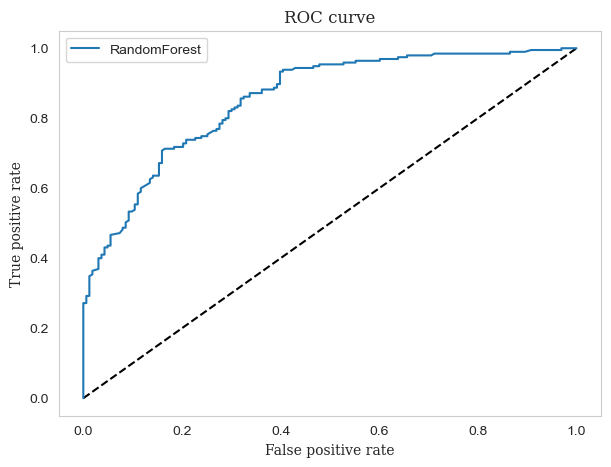

In [80]:
fit = rf.fit(X_train, y_train)
y_pred_rf = fit.predict_proba(X_test)[:, 1]
y_pred = fit.predict(X_test)
fpr_bc, tpr_bc, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bc, tpr_bc, label = 'RandomForest')
plt.grid(False)
plt.xlabel('False positive rate', fontfamily = 'Serif')
plt.ylabel('True positive rate', fontfamily = 'Serif')
plt.title('ROC curve', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'best')
plt.show()

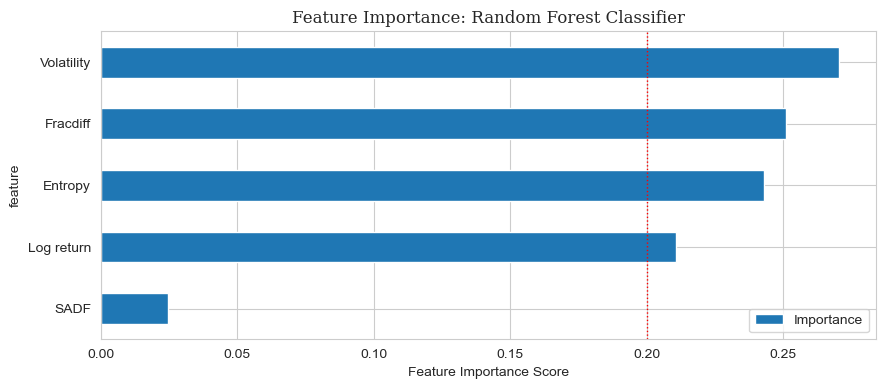

In [81]:
title = 'Feature Importance: Random Forest Classifier'
figsize = (10, 4)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending = False, inplace = True)
feat_imp = feat_imp

feat_imp.sort_values(by = 'Importance', inplace = True)
feat_imp = feat_imp.set_index('feature', drop = True)
feat_imp.plot.barh(figsize = figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.title(title, fontsize = 12, fontfamily = 'Serif')
plt.show()

In [82]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(matrix['Volatility'], matrix['Entropy'])
print('Correlation : %.4f' % matrix['Volatility'].corr(matrix['Entropy']))
print('Cointegration test p-value : %.4f' % p_value)
print('Cointegration test score : %.4f'  % score)

Correlation : 0.1610
Cointegration test p-value : 0.0032
Cointegration test score : -4.2382


In [83]:
from OptimalClustering import clusterKMeansBase

corr0, clstrs, silh = clusterKMeansBase(X.corr(), maxNumClusters = 10, n_init = 10)

maxNumClusters2


In [84]:
from featureImportance import featImpMDI_Clustered, featImpMDA, featImpMDI

imp = featImpMDA(fit, X_train, y_train)

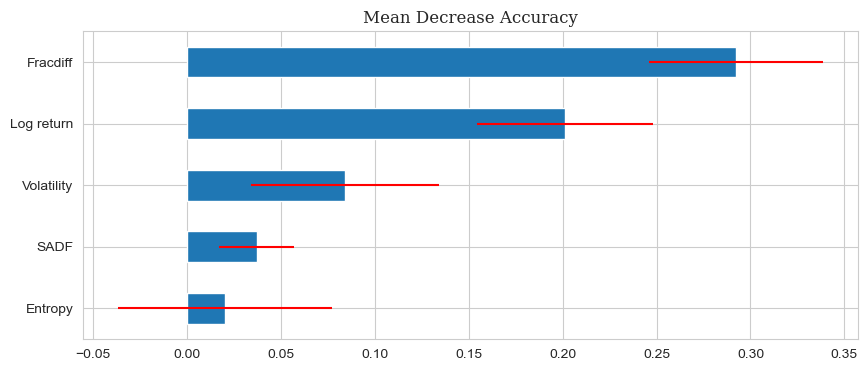

In [85]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Accuracy', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [86]:
imp = featImpMDI(fit, featNames = X.columns)

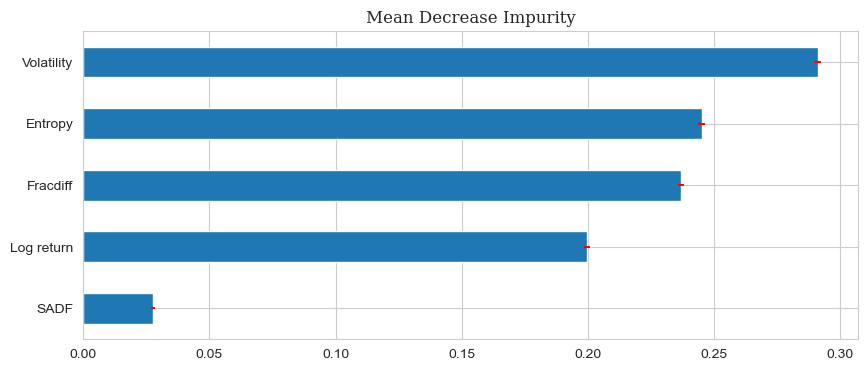

In [87]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Impurity', fontsize = 12, fontfamily = 'Serif')
plt.show()

Backtest

In [88]:
backtest = pd.DataFrame()
backtest['Predict'] = fit.predict(X_test)
backtest['Actual'] = y_test.values
backtest['Betting Size'] = fit.predict_proba(X_test)[:,1]
backtest['Return'] = X_test['Log return'].values
backtest['Backtest'] = fit.predict_proba(X_test)[:,1] * X_test['Log return'].values
backtest.index = X_test.index
backtest

,Predict,Actual,Betting Size,Return,Backtest
2022-02-25,0,0,0.500,0.012882,0.006441
2022-02-28,1,0,0.550,0.001636,0.000900
2022-03-01,0,0,0.032,-0.011696,-0.000374
2022-03-02,0,0,0.401,0.020379,0.008172
2022-03-03,1,0,0.760,-0.001983,-0.001507
...,...,...,...,...,...
2023-07-25,1,1,0.965,0.004503,0.004346
2023-07-26,1,1,0.976,0.004535,0.004426
2023-07-27,1,1,0.974,-0.006603,-0.006431
2023-07-28,1,1,0.947,0.013418,0.012706


Text(0.5, 1.0, 'Becktesting Machine Learning Model(Apple)')

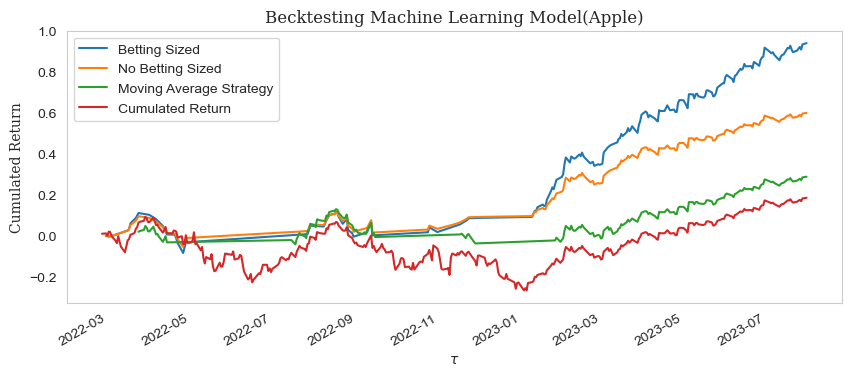

In [91]:
plt.figure(figsize = (10,4))
(backtest[backtest['Predict'] == 1]['Backtest']*2).cumsum().plot(label = 'Betting Sized')
backtest[backtest['Predict'] == 1]['Return'].cumsum().plot(label = 'No Betting Sized')
backtest[backtest['Actual'] == 1]['Return'].cumsum().plot(label = 'Moving Average Strategy')
backtest['Return'].cumsum().plot(label = 'Cumulated Return')
plt.legend()
plt.grid(False)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Cumulated Return', fontfamily = 'Serif')
plt.title('Becktesting Machine Learning Model(Apple)', fontsize = 12, fontfamily = 'Serif')

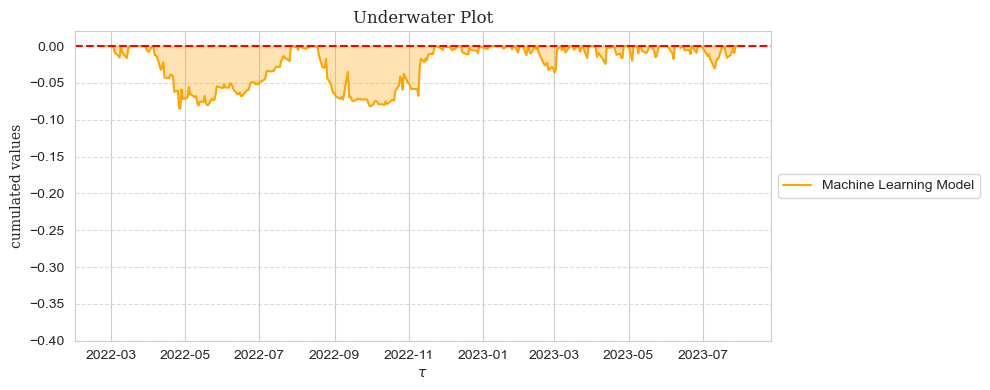

In [90]:
investment = 0
underwater = backtest['Backtest'].cumsum() - backtest['Backtest'].cumsum().cummax()

plt.figure(figsize = (10, 4))
plt.plot(underwater, label = 'Machine Learning Model', color = 'orange')
plt.axhline(y = investment, linestyle = '--', color = 'red')
plt.fill_between(underwater.index, underwater, where = (underwater < investment),
                 interpolate = True, color = 'orange', alpha = 0.3)

plt.xlabel(r'$\tau$')
plt.ylabel('cumulated values', fontfamily = 'Serif')
plt.ylim([-0.4,0.02])
plt.title('Underwater Plot', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

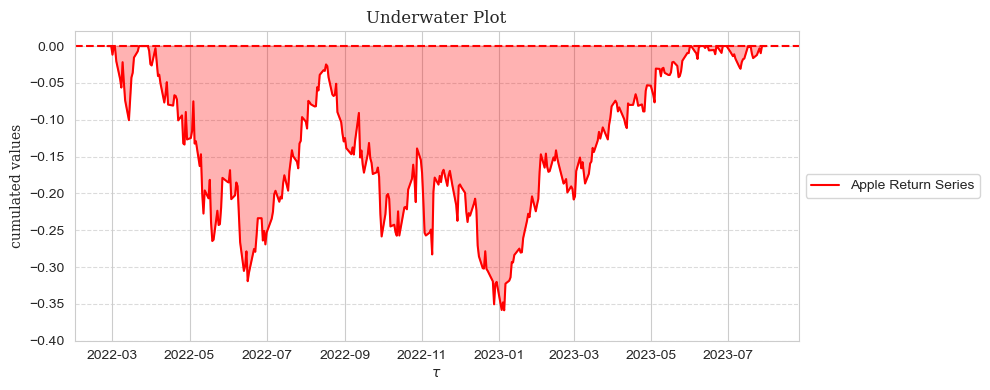

In [74]:
underwater2 = backtest['Return'].cumsum() - backtest['Return'].cumsum().cummax()

plt.figure(figsize = (10, 4))
plt.axhline(y = investment, linestyle = '--', color = 'red')
plt.plot(underwater2, label = 'Apple Return Series', color = 'red')
plt.fill_between(underwater2.index, underwater2, where = (underwater2 < investment),
                 interpolate = True, color = 'red', alpha = 0.3)

plt.xlabel(r'$\tau$')
plt.ylabel('cumulated values', fontfamily = 'Serif')
plt.ylim([-0.4,0.02])
plt.title('Underwater Plot', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()